![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error,accuracy_score, f1_score, r2_score
from sklearn.ensemble import BaggingClassifier

In [38]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [39]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [40]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

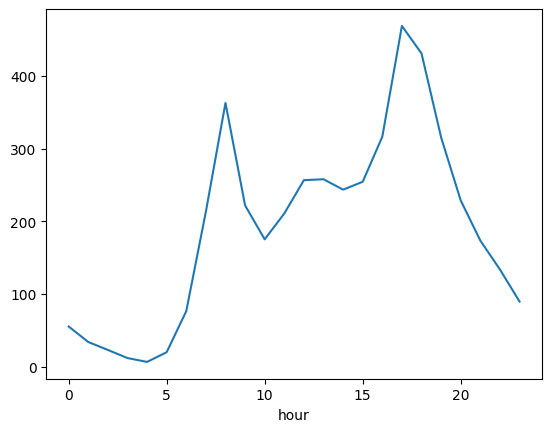

In [41]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

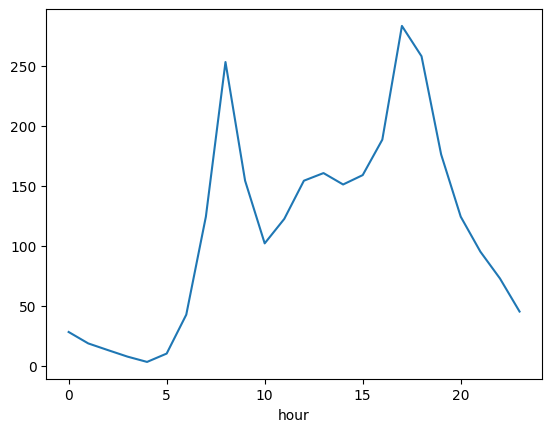

In [42]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes.query('season==1').groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

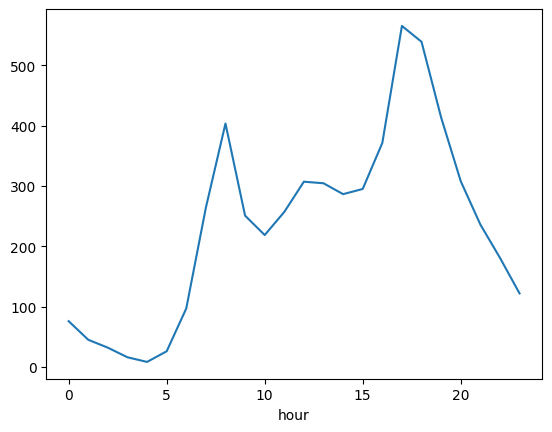

In [43]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes.query('season==3').groupby('hour').total.mean().plot()

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [49]:
# Celda 3

X=bikes[["season","hour"]]
y=bikes["total"]
X=pd.get_dummies(bikes[['season', 'hour']], columns=['season'], drop_first=True)

reg=LinearRegression()
reg.fit(X,y)

(reg.coef_,reg.intercept_)

(array([ 10.54520609, 100.31723192, 119.46754995,  84.08311787]),
 np.float64(-6.430262462306814))

In [10]:
# Dividir la muestra en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg=LinearRegression()
reg.fit(X_train,y_train)
       
# Predicción
y_pred = reg.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error: ", mse)
print("R²: ", r2)
(reg.coef_,reg.intercept_)

Mean Squared Error:  25592.233069213853
R²:  0.2135217904404797


(array([ 10.727042  ,  99.75849224, 115.07834048,  88.91820601]),
 np.float64(-8.187223101039052))

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [11]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = 6
num_pct = 10
min_gain=0.001

In [12]:
# Definición de la función que calcula el MSE
def mse(y):
    if y.shape[0] == 0:
        return 0
    else:
        return np.mean((y - y.mean())**2)

In [13]:
def mse_reduction(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    mse_y = mse(y)
    mse_l = mse(y_l)
    mse_r = mse(y_r)
    
    mse_reduction_ = mse_y - (n_l / (n_l + n_r) * mse_l + n_r / (n_l + n_r) * mse_r)
      
    return mse_reduction_

In [14]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, reduction
    
    # Para todas las variables 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            reduction = mse_reduction(X.iloc[:, j], y, split)
                        
            if reduction > best_split[2]:
                best_split = [j, split, reduction]
    
    return best_split

In [15]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean()
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [16]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        predicted = tree['y_pred']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted

In [17]:
tree=tree_grow(X_train, y_train, level=0, min_gain=min_gain, max_depth=12, num_pct=num_pct)
tree

{'y_pred': np.float64(191.37034120734907),
 'level': 0,
 'split': [0, np.float64(8.0)],
 'n_samples': 7620,
 'gain': np.float64(9407.867165488562),
 'sl': {'y_pred': np.float64(54.60392156862745),
  'level': 1,
  'split': [0, np.float64(7.0)],
  'n_samples': 2550,
  'gain': np.float64(3490.632491357409),
  'sl': {'y_pred': np.float64(32.54423592493298),
   'level': 2,
   'split': [0, np.float64(6.0)],
   'n_samples': 2238,
   'gain': np.float64(345.6313468233898),
   'sl': {'y_pred': np.float64(24.950469238790408),
    'level': 3,
    'split': [0, np.float64(1.0)],
    'n_samples': 1918,
    'gain': np.float64(168.69183262594618),
    'sl': {'y_pred': np.float64(53.599388379204896),
     'level': 4,
     'split': [2, np.float64(1.0)],
     'n_samples': 327,
     'gain': np.float64(158.03832590384695),
     'sl': {'y_pred': np.float64(46.326530612244895),
      'level': 5,
      'split': [3, np.float64(1.0)],
      'n_samples': 245,
      'gain': np.float64(34.865228197725855),
      's

In [18]:
y_pred=tree_predict(X_test, tree)
y_pred

array([242.73417722,  43.11842105, 419.39506173, ..., 180.13095238,
       399.48717949,   3.65789474], shape=(3266,))

In [19]:
mse_treeM = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse_treeM)

Mean Squared Error:  13776.897591163506


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [20]:
# Celda 5
from sklearn.model_selection import GridSearchCV
reg=DecisionTreeRegressor()

# Parámetros
param_grid = {'max_depth': [6, 12, 18, 24],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3]}

# Búsqueda mejor modelo
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Mejores parámetros
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Estimar el modelo
best_regressor = grid_search.best_estimator_

# Predicción
y_pred = best_regressor.predict(X_test)

# Calcular MSE
mse_tree = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse_tree)

Best parameters:  {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.6109301888824614
Mean Squared Error:  13776.897591163506


[Text(0.45481770833333335, 0.9583333333333334, 'x[0] <= 6.5\nsquared_error = 32925.886\nsamples = 7620\nvalue = 191.37'),
 Text(0.16041666666666668, 0.875, 'x[0] <= 5.5\nsquared_error = 1527.538\nsamples = 2238\nvalue = 32.544'),
 Text(0.3076171875, 0.9166666666666667, 'True  '),
 Text(0.07916666666666666, 0.7916666666666666, 'x[0] <= 0.5\nsquared_error = 872.544\nsamples = 1918\nvalue = 24.95'),
 Text(0.03333333333333333, 0.7083333333333334, 'x[2] <= 0.5\nsquared_error = 1693.103\nsamples = 327\nvalue = 53.599'),
 Text(0.025, 0.625, 'x[3] <= 0.5\nsquared_error = 1281.861\nsamples = 245\nvalue = 46.327'),
 Text(0.016666666666666666, 0.5416666666666666, 'x[1] <= 0.5\nsquared_error = 1028.402\nsamples = 164\nvalue = 42.177'),
 Text(0.008333333333333333, 0.4583333333333333, 'squared_error = 541.627\nsamples = 81\nvalue = 29.951'),
 Text(0.025, 0.4583333333333333, 'squared_error = 1215.205\nsamples = 83\nvalue = 54.108'),
 Text(0.03333333333333333, 0.5416666666666666, 'squared_error = 1689

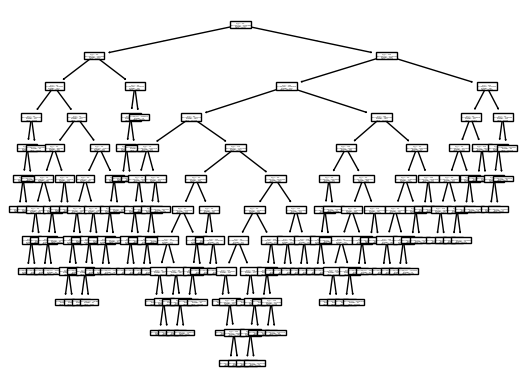

In [21]:
from sklearn import tree
tree.plot_tree(best_regressor)

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [22]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [23]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

np.float64(0.5)

In [24]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [25]:
# Celda 6
# Árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [6, 12, 18, 24],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3]}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)
accuracyclf = accuracy_score(y_test, y_pred)
f1clf = f1_score(y_test, y_pred)

print("Accuracy Tree: ", accuracyclf)
print("F1-Score Tree: ", f1clf)

# Regresión logísitca
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracylr = accuracy_score(y_test, y_pred)
f1lr = f1_score(y_test, y_pred)

print("Accuracy LR: ", accuracylr)
print("F1-Score LR: ", f1lr)

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best score:  0.6055555555555555
Accuracy Tree:  0.626
F1-Score Tree:  0.623237071860309
Accuracy LR:  0.6146666666666667
F1-Score LR:  0.6131191432396251


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [26]:
# Celda 7
# Creación de 300 muestras de bootstrap 
np.random.seed(123)
n_samples = X_train.shape[0]
n_B = 300
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

In [27]:
tree1 = {}
tree2 = {}
lr = {}

# DataFrame para guardar las predicciones de cada árbol
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# Entrenamiento de un árbol sobre cada muestra boostrap y predicción sobre los datos de test
for i in range(0,100):
    X_b = X_train.iloc[samples[i],]
    y_b = y_train.iloc[samples[i],]
    tree1[i]=DecisionTreeClassifier(max_depth=5)
    tree1[i].fit(X_b, y_b)
    y_pred.iloc[:,i] = tree1[i].predict(X_test)

for i in range(101,200):
    X_b = X_train.iloc[samples[i],]
    y_b = y_train.iloc[samples[i],]
    tree2[i]=DecisionTreeClassifier(min_samples_leaf=10)
    tree2[i].fit(X_b, y_b)
    y_pred.iloc[:,i] = tree2[i].predict(X_test)

for i in range(201,300):
    X_b = X_train.iloc[samples[i],]
    y_b = y_train.iloc[samples[i],]
    lr[i]=LogisticRegression()
    lr[i].fit(X_b, y_b)
    y_pred.iloc[:,i] = lr[i].predict(X_test)

In [28]:
results=y_pred
results.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,0,1,1,1,1,1,1,1,...,0,1,1,0,1,1,0,0,0,0
2520,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
y_pred=y_pred.mode(axis=1)[0]
y_pred

1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Name: 0, Length: 1500, dtype: int64

In [30]:
accuracyvm = accuracy_score(y_pred, y_test)
f1scorevm = f1_score(y_pred, y_test)

print("Accuracy VM: ", accuracyvm)
print("F1-Score VM: ", f1scorevm)

Accuracy VM:  0.6306666666666667
F1-Score VM:  0.6246612466124661


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [31]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

errors = np.zeros(300)

for i in range(0,100):
    y_pred_ = tree1[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1-accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    
for i in range(101,200):
    y_pred_ = tree2[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1-accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    
for i in range(201,300):
    y_pred_ = lr[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1-accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

In [32]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

In [33]:
# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((results) * alpha).sum(axis=1)
weighted_sum_1

1483    0.922186
2185    0.674596
2520    0.802656
3721    0.844865
3727     0.08721
          ...   
3077     0.29607
5166    0.156233
2227    0.730429
5684    0.222347
1937    0.092342
Length: 1500, dtype: object

In [34]:
# Desempeño al hacer votación ponderada
y_pred_vp = (weighted_sum_1 >= 0.5).astype(int)
accuracyvp=accuracy_score(y_pred_vp, y_test)
f1scorevp=f1_score(y_pred_vp, y_test)

print("Accuracy VP: ", accuracyvp)
print("F1-Score VP: ", f1scorevp)

Accuracy VP:  0.632
F1-Score VP:  0.625


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [35]:
# Celda 9

print("Accuracy VM: ", accuracyvm)
print("F1-Score VM: ", f1scorevm)

print("Accuracy VP: ", accuracyvp)
print("F1-Score VP: ", f1scorevp)

Accuracy VM:  0.6306666666666667
F1-Score VM:  0.6246612466124661
Accuracy VP:  0.632
F1-Score VP:  0.625
